In [1]:
# MAP DISPLAY 100x100

In [3]:
#!pip install geopandas 
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
from shapely.geometry import Polygon, Point
from geopandas import GeoSeries

In [4]:
def readPolygonFromFile(filename):
  with open(filename) as f:
      str = [word for line in f for word in line.split(", ")]
  
  geom = []
  for i in range(len(str)):
      lon, lat = str[i].split(" ")
      geom.append((float(lon), float(lat)))
  p1 = Polygon(geom)
  poly_gdf = gpd.GeoDataFrame(geometry = [p1], crs = "EPSG:3346")
  return poly_gdf

Average income :  2081370.347183567


Text(0.5, 0.98, 'Income')

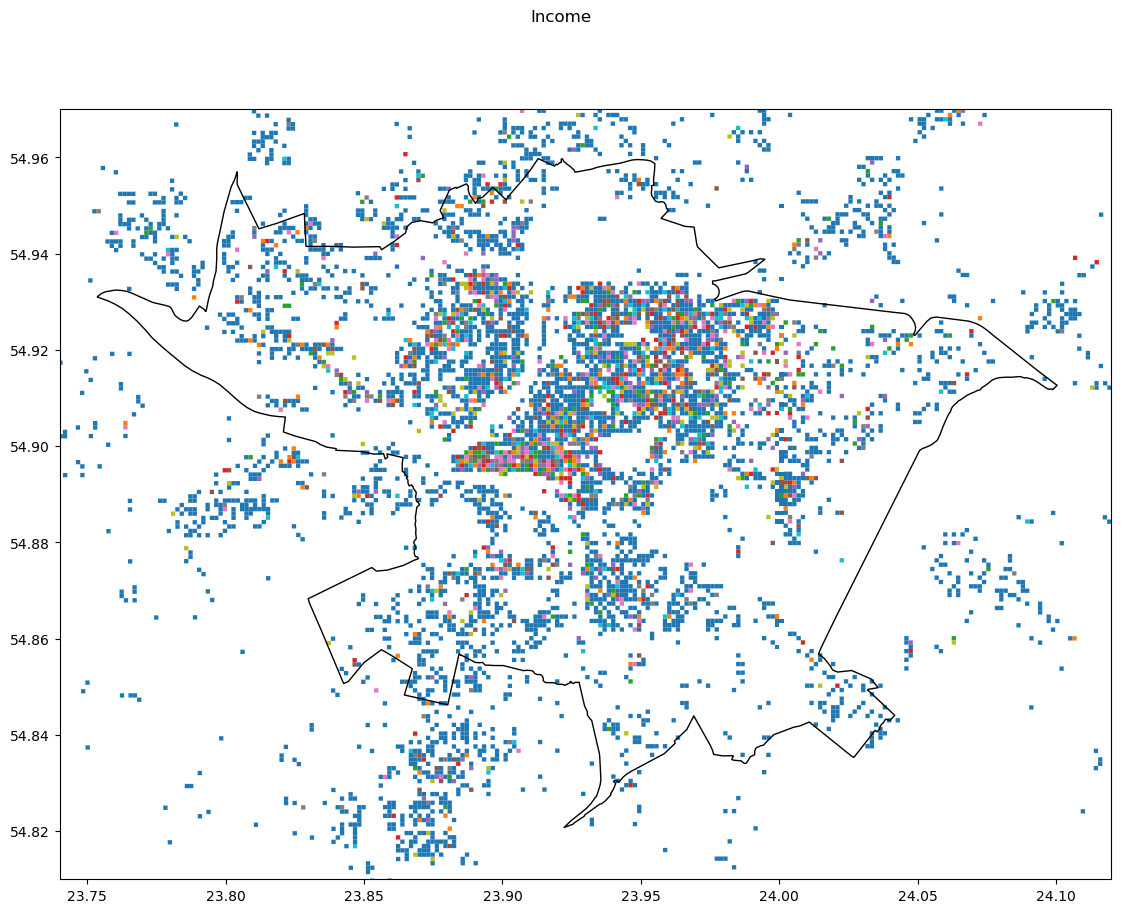

In [8]:
geo_data = gpd.read_file('100eco/grid100.shp')
geo_data = geo_data.to_crs(epsg=4326)

geo_data_2021_ = geo_data[geo_data.metai ==  2021 ]

plt.rcParams["figure.figsize"] = (20,10)

incomeSum = 0
numberInSum = 0
for index, row in geo_data_2021_.iterrows():
    grid_id = row['grid_id']
    pajamos_value = row['pajamos']
    #print(f"GRID_ID: {grid_id}, PAJAMOS: {pajamos_value}")
    numberInSum += 1
    incomeSum += int(pajamos_value)
print("Average income : ", (incomeSum / numberInSum))

fig, ax =  plt.subplots(1, 1)
#print(geo_data.head())

geo_data_2021_.plot(column = geo_data.pajamos , ax = ax)

plt.ylim((54.81, 54.97))
plt.xlim((23.74, 24.12))

exteriorLine = readPolygonFromFile("kaunas.txt")
exteriorLineScaled = exteriorLine.to_crs(epsg=4326)
exteriorLineScaled.plot(ax = ax, facecolor="none", edgecolor="black")

plt.ylim((54.81, 54.97))
plt.xlim((23.74, 24.12))
fig.suptitle('Income')